<a href="https://colab.research.google.com/github/Trangng320/Tri-Tue-Nhan-Tao/blob/main/Tr%C3%AD_Tu%E1%BB%87_Nh%C3%A2n_T%E1%BA%A1o_1_11_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [ ]:
Y_test.shape

(10000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
from keras.utils import to_categorical
Y_train = to_categorical (Y_train)
Y_test= to_categorical(Y_test )
Y_train.shape

(60000, 10)

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation = 'relu',input_shape = (28,28,1), padding = 'same'))
model.add(MaxPooling2D((2,2),padding = 'same'))
model.add(Conv2D(64, kernel_size=(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2),padding = 'same'))
model.add(Conv2D(128,kernel_size=(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2),padding = 'same'))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.compile (loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = 'adam')

In [ ]:
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 20, verbose = 2)

Epoch 1/20
469/469 - 64s - loss: 0.7301 - accuracy: 0.9119 - 64s/epoch - 137ms/step
Epoch 2/20
469/469 - 64s - loss: 0.0515 - accuracy: 0.9839 - 64s/epoch - 137ms/step
Epoch 3/20
469/469 - 64s - loss: 0.0350 - accuracy: 0.9892 - 64s/epoch - 136ms/step
Epoch 4/20
469/469 - 64s - loss: 0.0264 - accuracy: 0.9918 - 64s/epoch - 137ms/step
Epoch 5/20
469/469 - 66s - loss: 0.0227 - accuracy: 0.9923 - 66s/epoch - 141ms/step
Epoch 6/20
469/469 - 64s - loss: 0.0205 - accuracy: 0.9931 - 64s/epoch - 136ms/step
Epoch 7/20
469/469 - 65s - loss: 0.0203 - accuracy: 0.9935 - 65s/epoch - 138ms/step
Epoch 8/20
469/469 - 64s - loss: 0.0158 - accuracy: 0.9949 - 64s/epoch - 137ms/step
Epoch 9/20
469/469 - 64s - loss: 0.0171 - accuracy: 0.9945 - 64s/epoch - 136ms/step
Epoch 10/20
469/469 - 64s - loss: 0.0141 - accuracy: 0.9952 - 64s/epoch - 135ms/step
Epoch 11/20
469/469 - 64s - loss: 0.0153 - accuracy: 0.9950 - 64s/epoch - 136ms/step
Epoch 12/20
469/469 - 64s - loss: 0.0170 - accuracy: 0.9944 - 64s/epoch - 

In [ ]:
model.save('abc.h5')

In [ ]:
from keras.models import load_model
model100 = load_model('abc.h5')

1/1 [==============================] - 0s 15ms/step
[[0.09818534 0.11066779 0.09862728 0.09943624 0.10075084 0.0956976
  0.0993375  0.09984219 0.09767364 0.0997816 ]
 [0.09834902 0.11075043 0.09873831 0.09972894 0.10046044 0.09569263
  0.09915427 0.09984487 0.09762304 0.09965797]
 [0.098473   0.11051017 0.09909886 0.09981535 0.10027853 0.09575399
  0.09906135 0.0999008  0.09751662 0.09959131]]
Kết quả:  sobon
Độ chính xác:  0.110667795


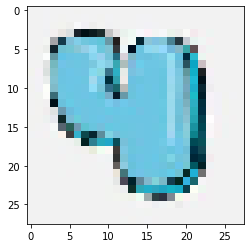

In [ ]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np

url = "sobon.jpg"
img = load_img(url, target_size=(28,28,))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(-1, 28, 28,)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 28,28,)

class_names = ["soba", "sobon", "sohai", "sokhong", "somot"]
prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)

In [ ]:
metric = model.evaluate(X_test,Y_test, verbose = 2)
print('Sai số:',metric[0])
print('Độ chính xác:',metric[1])

313/313 - 4s - loss: 0.0951 - accuracy: 0.9834 - 4s/epoch - 12ms/step
Sai số: 0.09507287293672562
Độ chính xác: 0.9833999872207642


Text(0.5, 0, 'số lần học')

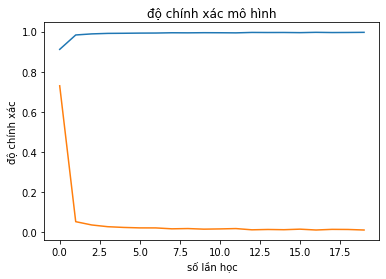

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('độ chính xác mô hình')
plt.ylabel('độ chính xác')
plt.xlabel('số lần học')

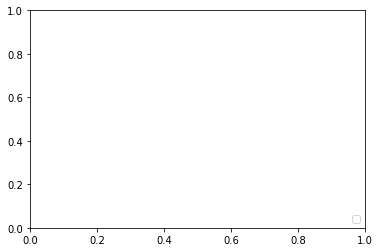

In [ ]:
plt.legend(['độ chính xác','Sai số'],loc = 'lower right')